In [1]:
#### Importing libraries.

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas.plotting import register_matplotlib_converters #Register pandas formatters and converters with matplotlib.
from pylab import rcParams # for customizing matplotlib graphs.
sns.set_style("whitegrid") # This one is very important to keep overall plot background as white

from numpy import asarray
import missingno as msno

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline      
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier
from sklearn.svm           import SVC

In [2]:
data = pd.read_csv(r'C:\Users\rnr31\Documents\GitHub\apple_watch_tracker\Datasets\dataset_0.5sec.csv')
oe = OrdinalEncoder()
ct = asarray(data['user'])
data['user'] = oe.fit_transform(ct.reshape(-1,1))
data = data.sort_values(by='user')
data

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
62584,62584,84508,630.0,NaN,100.0,15.892297,15.892297,15.892297,3.606631,0.838142,...,89.730876,89.730876,89.730876,NaN,0.75,0.75,0.75,NaN,Walking,0.0
21106,21106,8609,234.0,NaN,100.0,10.142241,10.142241,10.142241,0.007413,0.840593,...,89.770732,89.770732,89.770732,NaN,13.50,13.50,13.50,NaN,Car,0.0
21105,21105,22422,1727.0,NaN,8.0,10.033811,9.701954,10.334343,0.317356,0.890862,...,89.794108,89.794108,89.794108,NaN,20.50,20.50,20.50,NaN,Car,0.0
21104,21104,11240,1151.0,NaN,100.0,10.044192,9.843447,10.144604,0.173851,0.772161,...,NaN,NaN,NaN,NaN,32.50,32.50,32.50,NaN,Car,0.0
21103,21103,7828,289.0,NaN,85.0,8.514446,8.514446,8.514446,0.062750,0.734319,...,89.738523,89.738523,89.738523,NaN,12.25,12.25,12.25,NaN,Car,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37690,37690,129745,309.0,NaN,8.0,10.805771,10.805771,10.805771,0.102640,NaN,...,71.595672,71.595672,71.595672,NaN,NaN,NaN,NaN,NaN,Train,12.0
37689,37689,129760,324.0,NaN,8.0,10.389200,10.389200,10.389200,0.019366,NaN,...,68.089832,68.089832,68.089832,NaN,NaN,NaN,NaN,NaN,Train,12.0
37688,37688,131014,1578.0,NaN,8.0,10.718977,10.704910,10.733045,0.019895,NaN,...,70.312179,70.312179,70.312179,NaN,NaN,NaN,NaN,NaN,Train,12.0
37699,37699,130782,1346.0,NaN,8.0,10.551876,10.463580,10.686567,0.118512,NaN,...,68.048667,68.048667,68.048667,NaN,NaN,NaN,NaN,NaN,Train,12.0


In [3]:
def col_names_change(data):
    data.drop(['Unnamed: 0','id', 'activityrecognition#0'],axis=1, inplace=True)
    data_col = ['time','activityrecognition_1']
    for i in data.columns[2:58]:
        b = i.split('.')[2].split('#')
        data_col.append(f'{b[0]}_{b[1]}')

    for i in data.columns[58:66]:
        b = i.split('#')
        data_col.append(f'{b[0]}_{b[1]}')

    data_col.append('target')
    data_col.append('user')
    data = pd.DataFrame.from_records(data.values)
    data.columns = data_col

    return data


data = col_names_change(data)
data

,time,activityrecognition_1,accelerometer_mean,accelerometer_min,accelerometer_max,accelerometer_std,game_rotation_vector_mean,game_rotation_vector_min,game_rotation_vector_max,game_rotation_vector_std,...,sound_mean,sound_min,sound_max,sound_std,speed_mean,speed_min,speed_max,speed_std,target,user
0,630.0,100.0,15.892297,15.892297,15.892297,3.606631,0.838142,0.838142,0.838142,0.006532,...,89.730876,89.730876,89.730876,NaN,0.75,0.75,0.75,NaN,Walking,0.0
1,234.0,100.0,10.142241,10.142241,10.142241,0.007413,0.840593,0.840593,0.840593,0.000640,...,89.770732,89.770732,89.770732,NaN,13.50,13.50,13.50,NaN,Car,0.0
2,1727.0,8.0,10.033811,9.701954,10.334343,0.317356,0.890862,0.890693,0.891030,0.000238,...,89.794108,89.794108,89.794108,NaN,20.50,20.50,20.50,NaN,Car,0.0
3,1151.0,100.0,10.044192,9.843447,10.144604,0.173851,0.772161,0.772161,0.772161,0.000368,...,NaN,NaN,NaN,NaN,32.50,32.50,32.50,NaN,Car,0.0
4,289.0,85.0,8.514446,8.514446,8.514446,0.062750,0.734319,0.734319,0.734319,0.002764,...,89.738523,89.738523,89.738523,NaN,12.25,12.25,12.25,NaN,Car,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,309.0,8.0,10.805771,10.805771,10.805771,0.102640,NaN,NaN,NaN,NaN,...,71.595672,71.595672,71.595672,NaN,NaN,NaN,NaN,NaN,Train,12.0
62581,324.0,8.0,10.389200,10.389200,10.389200,0.019366,NaN,NaN,NaN,NaN,...,68.089832,68.089832,68.089832,NaN,NaN,NaN,NaN,NaN,Train,12.0
62582,1578.0,8.0,10.718977,10.704910,10.733045,0.019895,NaN,NaN,NaN,NaN,...,70.312179,70.312179,70.312179,NaN,NaN,NaN,NaN,NaN,Train,12.0
62583,1346.0,8.0,10.551876,10.463580,10.686567,0.118512,NaN,NaN,NaN,NaN,...,68.048667,68.048667,68.048667,NaN,NaN,NaN,NaN,NaN,Train,12.0


<AxesSubplot:>

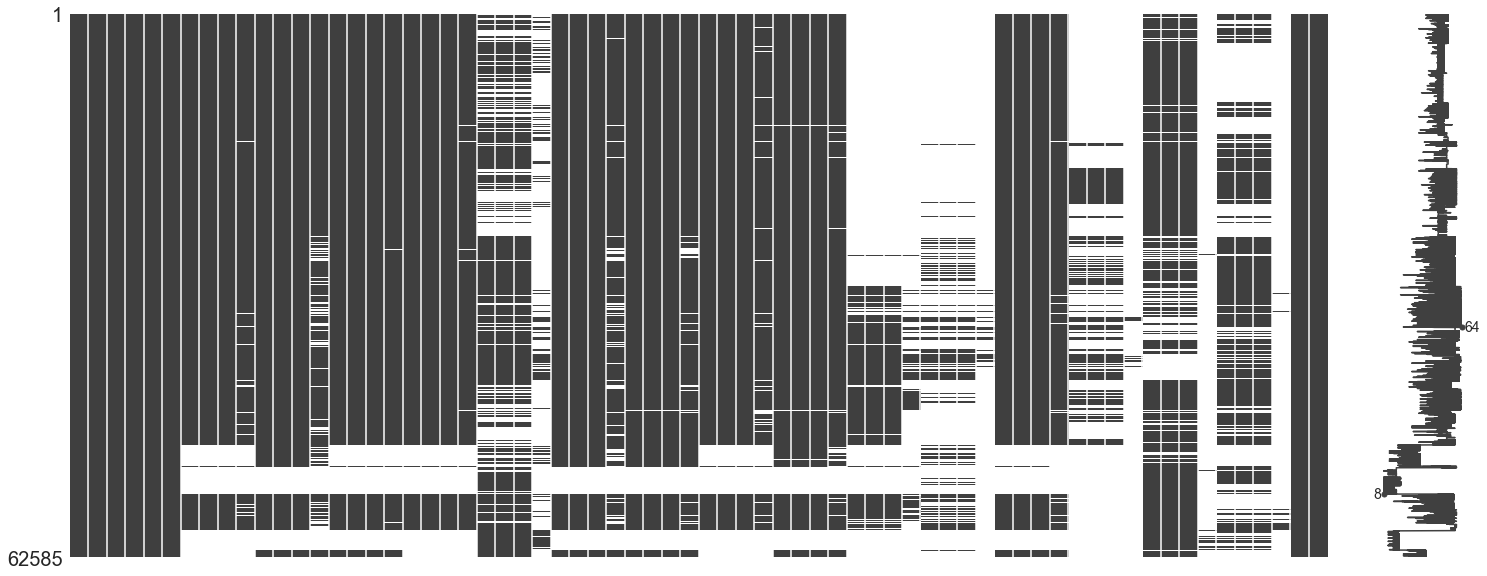

In [4]:
msno.matrix(data)

In [5]:
missing_num = data.isnull().sum()
missing_num

time                         0
activityrecognition_1        0
accelerometer_mean           0
accelerometer_min            0
accelerometer_max            0
                         ...  
speed_min                25920
speed_max                25920
speed_std                60894
target                       0
user                         0
Length: 68, dtype: int64

In [6]:
len(data)
missing_percent = missing_num/len(data)
final_missing = missing_percent.round(4)*100
final_missing.to_csv('missing_percent_0.5.csv')

In [7]:
data.drop(['pressure_mean', 'pressure_max', 'pressure_min', 'pressure_std', 'sound_std', 'speed_std','step_counter_mean','step_counter_std','light_std',
            'proximity_mean','proximity_min','proximity_max','proximity_std', 'step_counter_min', 'step_counter_max' ], axis=1, inplace=True)

data

,time,activityrecognition_1,accelerometer_mean,accelerometer_min,accelerometer_max,accelerometer_std,game_rotation_vector_mean,game_rotation_vector_min,game_rotation_vector_max,game_rotation_vector_std,...,rotation_vector_max,rotation_vector_std,sound_mean,sound_min,sound_max,speed_mean,speed_min,speed_max,target,user
0,630.0,100.0,15.892297,15.892297,15.892297,3.606631,0.838142,0.838142,0.838142,0.006532,...,0.994523,0.000100,89.730876,89.730876,89.730876,0.75,0.75,0.75,Walking,0.0
1,234.0,100.0,10.142241,10.142241,10.142241,0.007413,0.840593,0.840593,0.840593,0.000640,...,0.341133,0.000899,89.770732,89.770732,89.770732,13.50,13.50,13.50,Car,0.0
2,1727.0,8.0,10.033811,9.701954,10.334343,0.317356,0.890862,0.890693,0.891030,0.000238,...,0.884785,0.001769,89.794108,89.794108,89.794108,20.50,20.50,20.50,Car,0.0
3,1151.0,100.0,10.044192,9.843447,10.144604,0.173851,0.772161,0.772161,0.772161,0.000368,...,0.351964,0.000593,NaN,NaN,NaN,32.50,32.50,32.50,Car,0.0
4,289.0,85.0,8.514446,8.514446,8.514446,0.062750,0.734319,0.734319,0.734319,0.002764,...,0.551086,0.004103,89.738523,89.738523,89.738523,12.25,12.25,12.25,Car,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,309.0,8.0,10.805771,10.805771,10.805771,0.102640,NaN,NaN,NaN,NaN,...,0.459142,0.001581,71.595672,71.595672,71.595672,NaN,NaN,NaN,Train,12.0
62581,324.0,8.0,10.389200,10.389200,10.389200,0.019366,NaN,NaN,NaN,NaN,...,0.447098,0.001581,68.089832,68.089832,68.089832,NaN,NaN,NaN,Train,12.0
62582,1578.0,8.0,10.718977,10.704910,10.733045,0.019895,NaN,NaN,NaN,NaN,...,0.861405,0.000711,70.312179,70.312179,70.312179,NaN,NaN,NaN,Train,12.0
62583,1346.0,8.0,10.551876,10.463580,10.686567,0.118512,NaN,NaN,NaN,NaN,...,0.725028,0.000446,68.048667,68.048667,68.048667,NaN,NaN,NaN,Train,12.0


<AxesSubplot:>

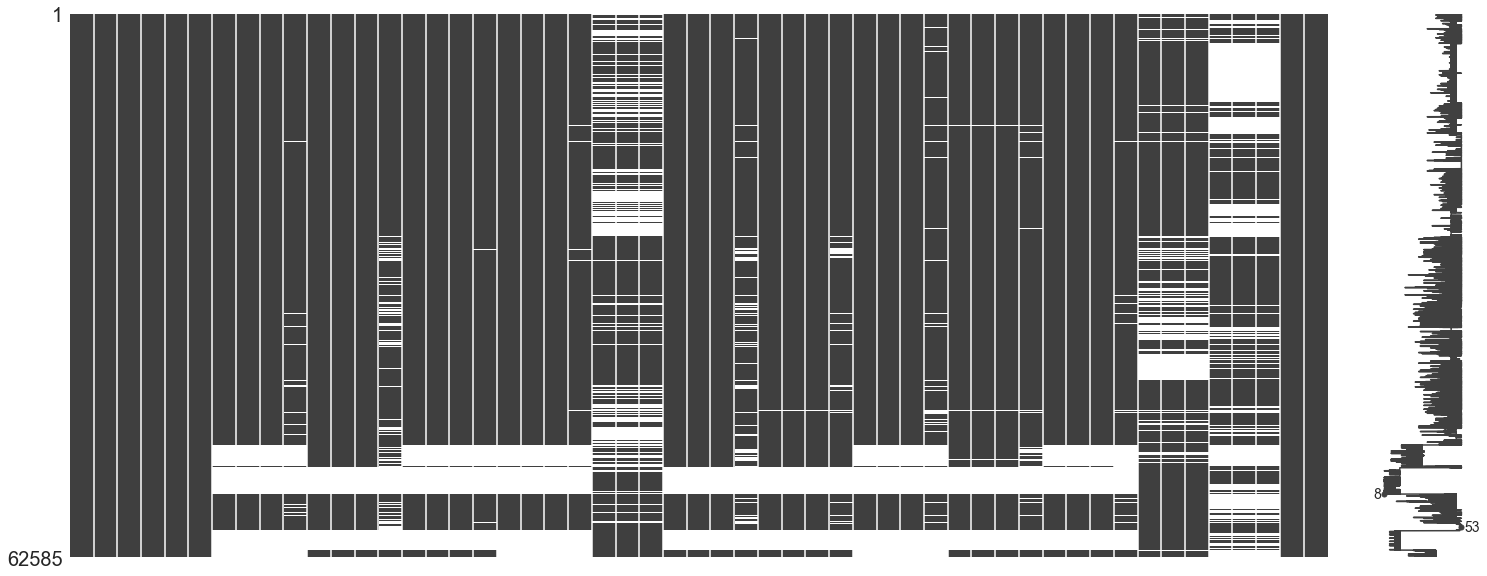

In [8]:
msno.matrix(data)

In [9]:
data = data.fillna(0)

In [14]:
df1 = data.groupby(['user'], as_index=False)['gyroscope_max'].mean()
df1

,user,gyroscope_max
0,0.0,0.430494
1,1.0,0.237827
2,2.0,0.086932
3,3.0,0.515228
4,4.0,0.154254
5,5.0,0.717449
6,6.0,0.596092
7,7.0,0.000000
8,8.0,0.906041
9,9.0,0.000000


In [13]:
data['gyroscope_mean'].mean()

0.28555929857828777